# Ecuaciones Diferenciales Ordinarias

Como es sabido en la [historia de la computación](https://youtu.be/jWum9IJPyks), uno de los problemas que motivo más fuertemente la construcción de computadoras digitales programables fue la solucionar las ecuaciones diferenciales ordinarias que describen la trayectoria de misiles balísticos (esto, claro, durante la segunda guerra mundial).

Dichas ecuaciones, así como muchas otras ecuaciones diferenciales ordinarias, son imposibles de resolver analíticamente, por lo que la única manera de resolverlas es acudir a métodos numéricos que nos permitan obtener una solución aproximada al problema.

Existen [libros enteros](https://books.google.com.mx/books?id=lZysESfSWwgC&printsec=frontcover&dq=leveque+finite+differences&hl=en&sa=X&ved=2ahUKEwi9hJaQ-arrAhVN5awKHXjgDnkQ6AEwAHoECAUQAg#v=onepage&q=leveque%20finite%20differences&f=false), y cursos también, dedicados al estudio de la solución numérica de ecuaciones diferenciales tanto ordinarias como parciales.

## Preludio Computacional 1: prealocación de memoria para arreglos

Durante el curso, hemos, en muchas ocasiones, construido arreglos que representan a los elementos de una sucesión, **iniciando con un arreglo que contiene un solo elemento y añadiéndole elementos uno a uno**. Esto se puede ya que, como ya mencionamos anteriormente, los arreglos en Julia son **dinámicos**. 

En general, es mala idea tratar con arreglos dinámicos pues es computacionalmente costoso ir asignando o  **alocando** memoria a elementos nuevos. Lo más conveniente, de ser posible, es construir un arreglo de la longitud que necesitemos desde un inicio. Así, podemos tratar al arreglo de manera **estática**: solo cambiamos sus elementos a nuestro gusto pero no cambiamos su longitud

En Julia, existen varias funciones para crear arreglos: 
* La función `zeros(n)` crea un arreglo 1D de longitud $n$ en la que cada elemento es un $0$.

* La función `ones(n)` crea un arreglo 1D de longitud $n$ en la que cada elemento es un $1$.

* La función `rand(n)` crea un arreglo 1D de longitud $n$ en la que cada elemento es un número aleatorio en el intervalo $[0,1]$

In [1]:
arr1 = zeros(10)
println("ceros")
println(arr1)
arr2 = ones(10)
println("unos")
println(arr2)
arr3 = rand(10)
println("aleatorios")
println(arr3)

ceros
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
unos
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
aleatorios
[0.8003510631840209, 0.4101320439113849, 0.8579331097464615, 0.5234381958176033, 0.44733476848457143, 0.00810758358575625, 0.453898058253688, 0.6616717600235262, 0.3933356452364807, 0.5079435731409363]


Noten también que `rand()` te genera un solo número aleatorio

In [2]:
println(rand())

0.1535703856332895


Por default, los arreglos creados con `zeros` y `ones` tienen elementos de tipo `Float64`. Sin embargo, podemos especificar que sean de otro tipo utilizando la sintaxis `zeros(T,n)` o `ones(T,n)` con `T` el tipo de interés

In [3]:
arr4 = zeros(5)
println(arr4)
println(typeof(arr4))
arr5 = zeros(Int32,5)
println(arr5)
println(typeof(arr5))

[0.0, 0.0, 0.0, 0.0, 0.0]
Array{Float64,1}
Int32[0, 0, 0, 0, 0]
Array{Int32,1}


Podemos usar la prealocación a la hora de construir sucesiones recursivas como las que usamos en la mayoría de métodos numéricos

In [4]:
# crea $n$ términos de la sucesión de fibonacci
function fibonacciPrealocado(n)
    # creamos arreglo para guardar los $n$ términos 
    final = zeros(Int64,n)
    # definimos los primeros elementos
    final[1] = 1
    final[2] = 1
    # creamos los demás, iniciando en el tercero
    for i in 3:n
        final[i] = final[i-1] + final[i-2]
    end
    return final
end

fibonacciPrealocado (generic function with 1 method)

In [6]:
fibonacciPrealocado(20)

20-element Array{Int64,1}:
    1
    1
    2
    3
    5
    8
   13
   21
   34
   55
   89
  144
  233
  377
  610
  987
 1597
 2584
 4181
 6765

## Preludio Computacional II: tuplas

Hasta ahora, hemos trabajado con objetos iterables como listas, arreglos y rangos, los cuales se pueden describir a grandes rasgos como sucesiones ordenadas de objetos. Sabemos que, en caso de las listas y los arreglos podemos cambiar sus elementos

In [7]:
nombres = ["aldo","david","crhistian"]
nombres[1] = "sayeg"
println(nombres)

["sayeg", "david", "crhistian"]


Podemos cambiar sus entradas por que las listas y los arreglos son **objetos mutables**, es decir, que pueden cambiar sus elementos. Existen objetos **no mutables** que también representan sucesiones de objetos pero que no podemos cambiar sus elementos. Dichos objetos son las **tuplas** (de tipo `Tuple` en Julia). Una tupla se define con la siguiente sintaxis

```julia
tup1 = (obj1,obj2,obj3)
```

In [8]:
tupNombres = ("aldo","david","crhistian")
println(tupNombres)
println(typeof(tupNombres))

("aldo", "david", "crhistian")
Tuple{String,String,String}


In [9]:
# al intentar cambiar un elemento arrojará un error
tupNombres[1] = "sayeg"

MethodError: MethodError: no method matching setindex!(::Tuple{String,String,String}, ::String, ::Int64)

`length` funciona de igual manera con las tuplas

In [10]:
println(length(tupNombres))

3


Nuevamente, por ser inmutable, no podemos añadirle objetos y `push!` fracasará

In [11]:
push!(tupNombres,"miguel")

MethodError: MethodError: no method matching push!(::Tuple{String,String,String}, ::String)
Closest candidates are:
  push!(::Any, ::Any, !Matched::Any) at abstractarray.jl:2158
  push!(::Any, ::Any, !Matched::Any, !Matched::Any...) at abstractarray.jl:2159
  push!(!Matched::Array{Any,1}, ::Any) at array.jl:920
  ...

### Preludio Computacional III: productos cartesianos

En las siguientes clases trabajaremos con objetos como campos vectoriales y otros análogos, los cuales viven en espacios de varias dimensiones.

Muchas veces nos va a interesar poder obtener el producto cartesiano de de dos arreglos, es decir, un objeto de la forma

$$\{(x,y) \; \mid \; x \in xs \; , \; y \in ys\}$$

Podemos utilizar comprensión de arreglos en Julia para crear ese arreglo con la siguiente sintaxis

```julia
prodCart = [[x,y] for x in xs for y in ys]
```

In [12]:
# Ejemplo simple
xs = [1,2,3]
ys = [8,9]
# se empieza a iterar por el úlimo arreglo
prodCart = [[x,y] for x in xs for y in ys]
display(prodCart)

6-element Array{Array{Int64,1},1}:
 [1, 8]
 [1, 9]
 [2, 8]
 [2, 9]
 [3, 8]
 [3, 9]

Podemos hacer esto mismo con tuplas:

In [13]:
nombres = ["aldo","david","miguel"]
apellidos = ["perez","lopez","medrano"]
# ahora tendremos tuplas en el producto cartesiano
prodCar = [(x,y) for x in nombres for y in apellidos]
display(prodCar)

9-element Array{Tuple{String,String},1}:
 ("aldo", "perez")
 ("aldo", "lopez")
 ("aldo", "medrano")
 ("david", "perez")
 ("david", "lopez")
 ("david", "medrano")
 ("miguel", "perez")
 ("miguel", "lopez")
 ("miguel", "medrano")

## Preludio Matemático: Ecuciones Diferenciales I

Sea $x(t): I \subseteq \mathbb{R} \to \mathbb{R}$ una función de clase $C^{1}$, es decir, una función derivable en todo $I$ con derivada continua en $I$. Una ecuación diferencial de primer orden es una ecuación **funcional**  de la siguiente forma

$$
\dot{x}(t) = f(x(t),t)
$$

Donde $\dot{x}(t) = \frac{dx}{dt} (t)$ y $f$ una función continua de dos variables. Notemos que, a diferencia de una ecuación **algebraica** donde las variables representan números o miembros de algún otra estructura algebraica "simple" (vectores, matrices, etc) que solo se operan con operadores algebraicos como suma, producto etc, en una ecuación diferencial algunas variables representan **funciones**.

Más aún, las operaciones que se les realizan a nuestros objetos no son operaciones algebraicas simples si no operaciones más delicadas una derivada o la aplicación de una función arbitraria.

La técnica más estándar para resolver una ecuación diferencial consiste en utilizar el teorema fundamental del cálculo para integrar ambos lados de la ecuación respecto al tiempo. Sin embargo, a la hora de realizar dicha integración, es probable que surgan **constantes de integración**. Para poder determinar dichas constantes, será necesario tener una **condición** sobre la función $x$, es decir, conocer un punto en el que sepamos su valor.

$$
x(t_i) = C
$$

### Problemas de valores iniciales

Aunque el punto $t_i$ puede ser un punto arbitrario del dominio de la función, en general, lo que tenemos que es que ese tiempo es un tiempo que llamamos **inicial** y denotamos $t_0$, y la solución $x(t)$ nos interesa conocerla para tiempos $t \geq t_0$. Cuando ese es el caso, decimos que tenemos un **problema de valores iniciales** descrito por las dos ecuaciones

$$
\begin{cases}
\dot{x}(t) = f(x(t),t) \\
x(t_0) = x_0 \\
\end{cases}
$$

### Campo de direcciones o "retrato fase"

Antes de resolver una ecuación diferencial, podemos darnos una idea del comportamiento que tendrán las soluciones si graficamos el campo de direcciones o retrato fase de la curva: el campo vectorial de las pendientes de las funciones que son solución a la ecuación diferencial pero no necesariamente a a la condición inicial. Dicho campo corresponde al campo vectorial $P:\mathbb{R}^2 \to \mathbb{R}^2$ definido por

$$
P(t,x) = (1,f(x,t))
$$

Recordando el tutorial de Plots para Julia, podemos graficar un campo vectorial utilizando la función `quiver` del paquete Plots. La sintaxis es 

```julia
quiver(xs,ys,vectorfield=(us,vs))
```

La función hace una grafica consistente en flechas entre los puntos `(xs[i],ys[i])` y `(xs[i]+us[i],ys[i]+vs[i])`

### Ejemplo 1:

Sea $\dot{x}(t) = \alpha x(t) $. Claramente, eso indica que $f(x(t),t) = \alpha x(t) $. El campo vectorial entonces es

$$
P(t,x) = ( 1,\alpha x)
$$

In [14]:
using Plots, LinearAlgebra

In [15]:
function campoVecEjemplo1(X,alpha)
    # X es un vector en cuya primera entrada representa a t y la segunda a x
    # es pura notación para poder definir la función
    return [1,X[2]*alpha]
end
function campoDireccionesEjemplo1(alpha)
    # definimos nuestros puntos ts yxs donde van a empezar las flechas
    ts = range(-1,stop=1,length=15)
    xs = range(0,stop=2,length=15)
    # hacemos el producto carteasiano ts x xs para tener puntos en R^2 donde poner flechas
    # la siguiente sintaxis nos construye el producto cartesiano de dos listas en otro
    dom =[[t,x] for t in ts for x in xs]
    # aplicamos el campo vectorial al los elementos del dominio
    imagen = [campoVecEjemplo1(X,alpha) for X in dom]
    # normalizamos cada elemento del campo vectorial para que tenga norma 0.1
    # normalize(arr) es una funcion de LinearAlgebra que nos regresa el vector `arr` normalizado
    imagen = [0.1*normalize(ima) for ima in imagen]
    # hacemos la gráfica del campo vectorial
    quiver([d[1] for d in dom],[d[2] for d in dom],vectorfield=([ima[1] for ima in imagen],[ima[2] for ima in imagen]))
    # otra manera de poner títulos
    # poner `$(var)` en un string remplaza ese pedazo por lo que haya en la variable `var`
    title!("Campo de direcciones para alpha = $(alpha)")
    # otra manera de poner título a los ejes
    xlabel!("t")
    ylabel!("x")
end

campoDireccionesEjemplo1 (generic function with 1 method)

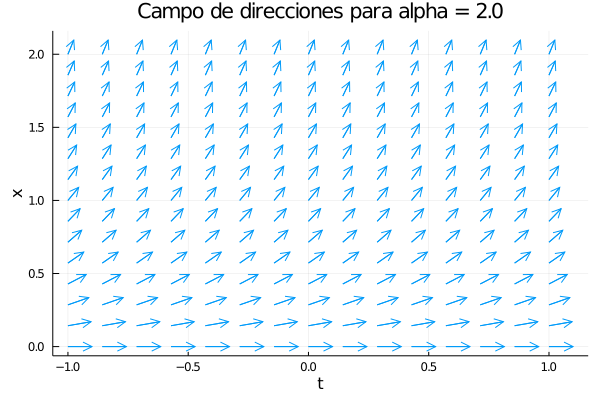

In [16]:
campoDireccionesEjemplo1(2.0)

## El método de Euler

El método más sencillo para resolver numéricamente un problema de valores iniciales es el **método de Euler**, que consiste en aproximar la derivada $\dot{x}$ con una diferencia finita hacia adelante. Así, obtenemos

$$
\frac{x(t+h) - x(t)}{h} = f(x(t),t)
$$

Despejando encontramos que

$$
x(t+h) = x(t) + h \; f(x(t),t)
$$

Es claro que, si conocemos $x(t_0) = x_0$ y $t_0$, esta regla nos permite calcular $x(t_0 +h)$ y, al tener $x(t_0+h)$ y también $t_0 + h$, posteriormente podemos calcular $x(t_0 + 2h)$ y así sucesivamente para obtener $x(t_0 + k h)$  para cualquier natural $k$. Planteandolo en términos de una sucesión recursiva, sea $t_k = t+ k h$ y entonces $x_{k} := x(t_k)$, entonces la sucesión recursiva del método de Euler es

$$
x_k = \begin{cases}
x_0 & k = 0\\
x_{k-1} + h f(x_{k-1},t_{k-1}) & k > 0\\
\end{cases}
$$

Notemos que esto solo nos dará los valores de $x(t)$ en un montón de tiempos discretos $t_0,t_1,t_2,\ldots$. Todos los métodos numéricos para EDO regresan la solución como un conjunto de puntos discretos. Si nosotros insitieramos en querer conocer, en lugar de puntos discretos, la función completa, podriamos utilizar interpolación para convertir los puntos discretos en una función.

### Ejercicio 1

implementa una función `primerEuler(f,x_0,t_0,t_f,h)` con `f` la función **vectorial** tal que $\dot{x}(t) = f(x(t),t)$, `x_0`, `t_0` la condición inicial, `t_f` el tiempo máximo al que queremos obtener la solución y `h` el tamaño de paso. La función debe de implementar el método de euler y debe de regresar el arreglo de los tiempos `[t_0,t_1, t_2,....,t_n]` con $t_{n} \leq t_f < t_{n} + h$ y el de la solución a la ecuación diferencial `[x_0,x_1,...,x_n]`.

**Sugerencia:** prealoquen los arreglos que van a guardar los tiempos y los puntos de la solución. utilicen una tupla para regresar ambos arreglos.

### Ejercicio 2

Utiliza tu función `primerEuler` para resolver las siguientes ecuaciones diferenciales (con las condiciones inciales y tiempo final de tu preferencia):

1. $\dot{x}(t) = 0.3 x(t) $ 

2. $\dot{x}(t) = 3t^2 - 5t $ 

3. $\dot{x}(t) = x(t)(1-x(t))$


Grafica el campo de direcciones para cada ecuación. Realiza una gráfica de la solución obtenida y compárala con la solución analítica en la misma gráfica

**Sugerencia**: ten cuidado pues no las condiciones iniciales que pueden utilizarse no son arbitrarias. (Por ejemplo, en la ecuación 1, no pueden tomar $t_0 = 0$, $x_0 = 0$)

### Ejercicio 3

Podemos definir el error absoluto de la solución numérica como la diferencia entre el último valor de la función obtenido numéricamente y su correspondiente valor analítico, es decir

$$
\text{error} = \mid x_n - x_{\text{analítica}}(t_n) \mid
$$

Para cada una de las funciones del ejercicio anterior, analiza el error absoluto como función del parámetro $h$. Realiza su gráfica y menciona algo sobre su comportamiento



## Ecuaciones de orden mayor: reducción

En la práctica del día a día, en particular en la física, por lo general tratamos con ecuaciones diferenciales de orden mayor a uno. En general, una ecuación diferencial de orden $l$ es una ecuación funcional de la forma

$$
y^{(l)} (t) = g(y^{(l-1)} (t),y^{(l-2)} (t), \ldots, y^{(1)}(t), y(t),t)
$$

Donde $y^{(l)} (t) = \frac{d^l y}{dt^l}$ es la $l$-ésima derivada de $y(t)$. Aunque podríamos desarrollar un método para atacar ecuaciones diferenciales de ese orden, existe un [**truco**](http://mathonline.wikidot.com/converting-nth-order-odes-to-systems-of-n-first-order-odes) para convertir una ecuación de orden $n$ en un sistema de ecuaciones de primer orden con $n$ variables. Definimos

$$
\begin{align}
 x_1(t) &= y(t) \\
 x_2(t) &= y^{(1)}(t) \\
 &\vdots \\
 x_i(t) &= y^{(i-1)}(t) \\
 &\vdots \\
 x_l(t) &= y^{(l-1)}(t)
\end{align}
$$

Entonces la ecuación diferencial se reduce al siguiente sistema

$$
\begin{align}
 \dot{x_1}(t) &= y^{(1)}(t) = x_2(t) \\
 \dot{x_2}(t) &= y^{(2)}(t) = x_3(t) \\
 &\vdots \\
 \dot{x_i}(t) &= y^{(i)}(t) = x_{i+1}(t) \\
 &\vdots \\
 \dot{x}_{l-1}(t) &= y^{(l-1)}(t) = x_{l}(t) \\
\dot{x_l}(t) &= y^{(l)}(t) 
\end{align}
$$

Pero

$$
y^{(l)}(t) = g(y^{(l-1)} (t),y^{(l-2)} (t), \ldots, y^{(1)}(t),y(t),t) = g(x_{l}(t),x_{l-1}(t),\ldots,x_1(t),t)
$$

Por lo que el sistema se vuelve

$$
\begin{align}
 \dot{x_1}(t) &= x_2(t) \\
 \dot{x_2}(t) &= x_3(t) \\
 &\vdots \\
 \dot{x_i}(t) &= x_{i+1}(t) \\
 &\vdots \\
 \dot{x}_{l-1}(t) &= x_{l}(t) \\
\dot{x_l}(t) &= g(x_{l}(t),\ldots,x_1(t),t)
\end{align}
$$

### Ejercicio 4

Analíticamente, convierte las siguientes ecuaciones diferenciales de orden $n$ en sistemas de $n$ ecuaciones diferenciales:

1. $y''(t) = -\frac{10}{m}$

2. $y'''(t) = t + 2y(t) + 3y''(t)$

3. $y''(t) = -\frac{k}{m} y(t) - \frac{c}{m} y'(t)$

## Método de euler vectorial

Sea entonces **el vector de funciones**  $\mathbf{x}(t) : \mathbb{R} \to \mathbb{R}^{l}$

$$\mathbf{x}(t) := (x_1(t),\ldots,x_{l}(t))$$ 

y la función vectorial $\mathbf{f}(\mathbf{x}(t),t) : \mathbb{R}^{l+1} \to \mathbb{R}^{l}$

$$\mathbf{f}(\mathbf{x}(t),t) = (x_2(t),\ldots,x_{l}(t),g(x_{l}(t),x_{l-1}(t),\ldots,x_1(t),t))$$ 

Podemos escribir el sistema de ecuaciones diferenciales de forma vectorial como

$$
\dot{\mathbf{x}}(t) = \mathbf{f}(\mathbf{x}(t),t)
$$

Que nuevamente admite una solución mediante el método de euler al aproximar la derivada del vector $\mathbf{x}(t)$ con una diferencia hacia adelante:

$$
\mathbf{x}(t+h) = \mathbf{x}(t) + h \; \mathbf{f}(\mathbf{x}(t),t)
$$

### Ejercicio 5

Implementa una función `eulerVec(f,x_0,t_0,t_f,h)` con `f` la función **vectorial** tal que $\dot{\mathbf{x}}(t) = \mathbf{f}(\mathbf{x}(t),t)$, `x_0` (un vector de $n$ entradas) y `t_0` la condición inicial, `t_f` el tiempo máximo al que queremos obtener la solución y `h` el tamaño de paso. La función debe de implementar el método de euler y debe de regresar el arreglo de los tiempos `[t_0,t_1, t_2,....,t_n]` con $t_{n} \leq t_f < t_{n} + h$ y el de la solución a la ecuación diferencial `[x_0,x_1,...,x_n]`.

**Sugerencia 1:** Prealoca los arreglos de los tiempos y las soluciones. Utiliza una tupla para regresar ambos arreglos.

**Sugerencia 2** puedes utilizar `zeros(n,l)` para prealocar una matriz de zeros de $n \times l$ en la cual puedes guardar como renglones cada vector $\mathbf{x}_i$

### Ejercicio 6

Utiliza tu función `eulerVec` para resolver los sistemas de ecuaciones obtenidos en el ejercicio 4. Nuevamente, puedes escoger arbitrariamente las condiciones iniciales, el tiempo final y las constantes de las ecucaiones ($m$,$k$,etc). 

Grafica  el **espacio fase** de tus soluciones, es decir, el conjunto

$$\{ \mathbf{x}(t) \; \mid \; t_0 \leq t \leq t_f\} \subset \mathbb{R}^2, \mathbb{R}^3$$

Si es posible, compara con la solución analítica

### Ejercicio 7

El inciso 1 y 3 del ejercicio 4, la variable $y(t)$ corresponde a la posición como función del tiempo para un objeto en **caída libre** o en un **oscilador armónico amortiguado**. Para unas condiciones iniciales, tiempo final y valor de los parámetros, soluciona el sistema y realiza una **animación** del movimiento del objeto (i.e animar $y(t)$ para distintos tiempos). Verifica que coincida con las soluciones que has visto en los cursos de mecánica.